## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.preprocessing import LabelEncoder


## Load Dataset

In [2]:
places_df = pd.read_csv("places.csv")
ratings_df = pd.read_csv("ratings.csv")
users_df = pd.read_csv("users.csv")

## Data Understanding

In [3]:
print("Ratings Data:")
print(ratings_df.head())
print("\nUsers Data:")
print(users_df.head())
print("\nPlaces Data:")
print(places_df.head())

Ratings Data:
   id  value  userId  placeId
0   1      4       1        1
1   2      3       1        2
2   3      5       1        3
3   4      4       1        4
4   5      5       1        5

Users Data:
   id    name              email     password preferences   age
0   1  User 1  user1@example.com  password123          []  21.0
1   2  User 2  user2@example.com  password123          []  21.0
2   3  User 3  user3@example.com  password123          []  21.0
3   4  User 4  user4@example.com  password123          []  29.0
4   5  User 5  user5@example.com  password123          []  29.0

Places Data:
   id                               name  \
0   1                   Monumen Nasional   
1   2                           Kota Tua   
2   3                      Dunia Fantasi   
3   4  Taman Mini Indonesia Indah (TMII)   
4   5           Atlantis Water Adventure   

                                         description       category  latitude  \
0  Monumen Nasional atau yang populer disingkat d

In [4]:
print("\nRatings Info:")
print(ratings_df.info())
print("\nUsers Info:")
print(users_df.info())
print("\nPlaces Info:")
print(places_df.info())


Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       4109 non-null   int64
 1   value    4109 non-null   int64
 2   userId   4109 non-null   int64
 3   placeId  4109 non-null   int64
dtypes: int64(4)
memory usage: 128.5 KB
None

Users Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61 non-null     int64  
 1   name         61 non-null     object 
 2   email        61 non-null     object 
 3   password     61 non-null     object 
 4   preferences  61 non-null     object 
 5   age          58 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB
None

Places Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (

In [5]:
print("\nRatings Description:")
print(ratings_df.describe())
print("\nUsers Description:")
print(users_df.describe())
print("\nPlaces Description:")
print(places_df.describe())


Ratings Description:
                id        value       userId      placeId
count  4109.000000  4109.000000  4109.000000  4109.000000
mean   2055.000000     3.823558    34.146508    68.528596
std    1186.310457     1.115427    16.346493    44.594243
min       1.000000     1.000000     1.000000     1.000000
25%    1028.000000     3.000000    22.000000    28.000000
50%    2055.000000     4.000000    37.000000    65.000000
75%    3082.000000     5.000000    47.000000   105.000000
max    4109.000000     5.000000    61.000000   150.000000

Users Description:
              id        age
count  61.000000  58.000000
mean   31.000000  22.568966
std    17.752934   4.687093
min     1.000000  19.000000
25%    16.000000  20.000000
50%    31.000000  21.000000
75%    46.000000  23.000000
max    61.000000  42.000000

Places Description:
               id    latitude   longitude         price
count  149.000000  149.000000  149.000000  1.490000e+02
mean    75.067114   -6.055084  106.800018  8.960403

In [6]:
print("\nMissing Values in Ratings:")
print(ratings_df.isnull().sum())
print("\nMissing Values in Users:")
print(users_df.isnull().sum())
print("\nMissing Values in Places:")
print(places_df.isnull().sum())


Missing Values in Ratings:
id         0
value      0
userId     0
placeId    0
dtype: int64

Missing Values in Users:
id             0
name           0
email          0
password       0
preferences    0
age            3
dtype: int64

Missing Values in Places:
id             0
name           0
description    0
category       0
latitude       0
longitude      0
price          0
image_url      0
dtype: int64


## Univariate EDA

In [7]:
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

### Distribusi kategori

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Taman Hiburan'),
  Text(1, 0, 'Budaya'),
  Text(2, 0, 'Pusat Perbelanjaan'),
  Text(3, 0, 'Bahari'),
  Text(4, 0, 'Tempat Ibadah'),
  Text(5, 0, 'Cagar Alam')])

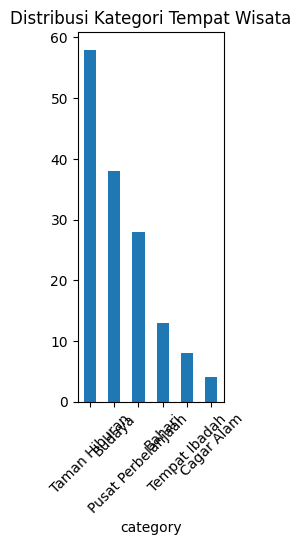

In [8]:
plt.subplot(1, 3, 1)
places_df['category'].value_counts().plot(kind='bar')
plt.title('Distribusi Kategori Tempat Wisata')
plt.xticks(rotation=45)

### Distribusi rating

Text(0.5, 1.0, 'Distribusi Rating')

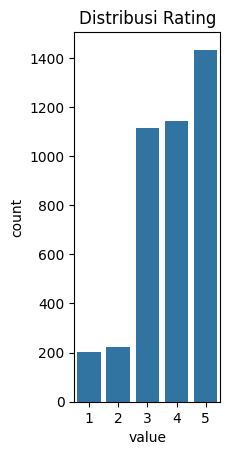

In [9]:
plt.subplot(1, 3, 2)
sns.countplot(data=ratings_df, x='value')
plt.title('Distribusi Rating')


### Distribusi usia

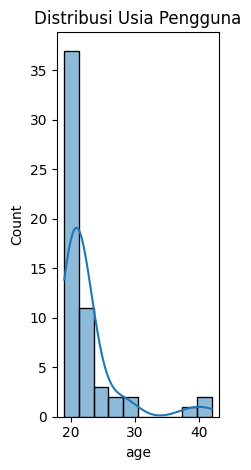

In [10]:
plt.subplot(1, 3, 3)
sns.histplot(users_df['age'].dropna(), bins=10, kde=True)
plt.title('Distribusi Usia Pengguna')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [11]:
# 1. Isi missing values di 'age' (Langkah paling awal terkait 'age')
users_df['age'].fillna(users_df['age'].median(), inplace=True)

# 2. Standarisasi data 'preferences' (Bisa dilakukan kapan saja sebelum penggunaan)
users_df['preferences'] = users_df['preferences'].astype(str).str.lower().str.strip()


<ipython-input-11-32528093637e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['age'].fillna(users_df['age'].median(), inplace=True)


## Data Preparation

In [12]:
# 3. Buat Series mapping userId ke age (Gunakan 'id' dari users_df)
user_ages = users_df.set_index('id')['age']

# 4. Gabungkan informasi umur ke ratings_df (Gunakan 'id' dari users_df dan 'userId' dari ratings_df)
ratings_df = ratings_df.join(user_ages, on='userId')

# 5. Bersihkan baris dengan missing 'age' di ratings_df
ratings_df.dropna(subset=['age'], inplace=True)

In [15]:
# Encode User IDs and Place IDs to be zero-indexed integers
user_encoder = LabelEncoder()
place_encoder = LabelEncoder()

ratings_df['user_idx'] = user_encoder.fit_transform(ratings_df['userId'])
ratings_df['place_idx'] = place_encoder.fit_transform(ratings_df['placeId'])

num_users = ratings_df['user_idx'].nunique()
num_places = ratings_df['place_idx'].nunique()
min_rating = ratings_df['value'].min()
max_rating = ratings_df['value'].max()

# Prepare data for TensorFlow model
X = ratings_df[['user_idx', 'place_idx']].values
y = ratings_df['value'].values

# Split data (similar to how you split for Surprise, but for TensorFlow)
# You can use the same random_state for consistency if desired
X_train, X_test, y_train, y_test = sk_train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tf = [X_train[:, 0], X_train[:, 1]]
X_test_tf = [X_test[:, 0], X_test[:, 1]]

## Content-Based Filtering

In [13]:
# Gabungkan kategori dan deskripsi
places_df['text_features'] = places_df['category'].astype(str) + " " + places_df['description'].astype(str)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(places_df['text_features'])

# Hitung Cosine Similarity antar tempat
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mapping index
place_indices = pd.Series(places_df.index, index=places_df['id']).to_dict()

# Fungsi rekomendasi berdasarkan content
def recommend_place_by_place(place_id, top_n=5):
    idx = place_indices[place_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]
    return places_df.iloc[top_indices][['id', 'name', 'category']]



### Contoh rekomendasi mirip tempat ID 10

In [14]:
print("📌 Rekomendasi Tempat Mirip ID=10")
print(recommend_place_by_place(10))

📌 Rekomendasi Tempat Mirip ID=10
      id              name category
12    13     Pulau Pramuka   Bahari
11    12        Pulau Pari   Bahari
10    11    Pulau Bidadari   Bahari
110  110    Pulau Tongkeng   Bahari
47    46  Pulau Semak Daun   Bahari


## Collaborative Filtering

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def create_tf_collaborative_filtering_model(num_users, num_items, embedding_size=50, min_rating=1.0, max_rating=5.0):
    # User input
    user_input = Input(shape=(1,), name='user_input')
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size,
                               embeddings_initializer='he_normal',
                               embeddings_regularizer=l2(1e-6), name='user_embedding')(user_input)
    user_vec = Flatten(name='flatten_user_vec')(user_embedding)

    # Item input
    item_input = Input(shape=(1,), name='item_input')
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size,
                               embeddings_initializer='he_normal',
                               embeddings_regularizer=l2(1e-6), name='item_embedding')(item_input)
    item_vec = Flatten(name='flatten_item_vec')(item_embedding)

    # Dot product of user and item embeddings
    dot_product = Dot(axes=1, name='dot_product')([user_vec, item_vec])

    # Optional: Add bias terms (can improve performance)
    user_bias = Embedding(input_dim=num_users, output_dim=1, name='user_bias')(user_input)
    user_bias_vec = Flatten(name='flatten_user_bias')(user_bias)

    item_bias = Embedding(input_dim=num_items, output_dim=1, name='item_bias')(item_input)
    item_bias_vec = Flatten(name='flatten_item_bias')(item_bias)

    # Add biases to the dot product
    # For a simpler model, you can skip biases and just use dot_product
    output = Add(name='add_biases')([dot_product, user_bias_vec, item_bias_vec])

    # Optional: For a more complex model (Neural Collaborative Filtering - NCF like)
    # concat = Concatenate()([user_vec, item_vec])
    # dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(1e-6))(concat)
    # dropout_1 = Dropout(0.4)(dense_1)
    # dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(1e-6))(dropout_1)
    # dropout_2 = Dropout(0.4)(dense_2)
    # output = Dense(1)(dropout_2) # For regression (rating prediction)

    # Scale the output to the rating range (optional but can help)
    # This is a more advanced technique; for simplicity, you can omit it
    # output = Dense(1, activation=lambda x: tf.clip_by_value(x, min_rating, max_rating))(output)
    # Or just a linear activation for direct regression:
    # output = Dense(1)(output) # if using the NCF-like structure above

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model_tf_collab = create_tf_collaborative_filtering_model(num_users, num_places, embedding_size=50, min_rating=min_rating, max_rating=max_rating)
model_tf_collab.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │      3,000 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │      7,350 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_user_vec    │ (None, 50)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_item_vec    │ (None, 50)        │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_bias           │ (None, 1, 1)      │         60 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_bias           │ (None, 1, 1)      │        147 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1)         │          0 │ flatten_user_vec… │
│                     │                   │            │ flatten_item_vec… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_user_bias   │ (None, 1)         │          0 │ user_bias[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_item_bias   │ (None, 1)         │          0 │ item_bias[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_biases (Add)    │ (None, 1)         │          0 │ dot_product[0][0… │
│                     │                   │            │ flatten_user_bia… │
│                     │                   │            │ flatten_item_bia… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,557 (41.24 KB)

 Trainable params: 10,557 (41.24 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [17]:
# Train the model
history = model_tf_collab.fit(
    x=X_train_tf,
    y=y_train,
    batch_size=64,
    epochs=20,  # Adjust epochs as needed
    verbose=1,
    validation_data=(X_test_tf, y_test)
)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 15.6213 - root_mean_squared_error: 3.9523 - val_loss: 15.2307 - val_root_mean_squared_error: 3.9026
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6471 - root_mean_squared_error: 3.8271 - val_loss: 14.4764 - val_root_mean_squared_error: 3.8048
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7407 - root_mean_squared_error: 3.7068 - val_loss: 13.6956 - val_root_mean_squared_error: 3.7007
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0408 - root_mean_squared_error: 3.6111 - val_loss: 12.8446 - val_root_mean_squared_error: 3.5839
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1257 - root_mean_squared_error: 3.4819 - val_loss: 11.8884 - val_root_mean_squared_error: 3.4479
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0740 - root_mean_squared_error: 3.3273 - val_loss: 10.7729 - val_root_mean_squared_error: 3.2822
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

### Evaluasi

In [18]:
loss, rmse = model_tf_collab.evaluate(X_test_tf, y_test, verbose=0)
print(f"TensorFlow Collaborative Filtering Test RMSE: {rmse}")

# For MAE:
# Compile with MAE: model.compile(..., metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])
# Then evaluate: loss, rmse, mae = model_tf_collab.evaluate(...)
# Or predict and calculate manually:
from sklearn.metrics import mean_absolute_error
y_pred_tf = model_tf_collab.predict(X_test_tf)
mae_tf = mean_absolute_error(y_test, y_pred_tf)
print(f"TensorFlow Collaborative Filtering Test MAE: {mae_tf}")

TensorFlow Collaborative Filtering Test RMSE: 0.9365110993385315
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
TensorFlow Collaborative Filtering Test MAE: 0.7158339619636536


### Recommendation Function

In [20]:
def predict_rating_tf(user_id_orig, place_id_orig, model, user_enc, place_enc):
    """
    Predicts rating for a single user-place pair using the TensorFlow model.
    Handles cases where user_id or place_id might not have been seen during training.
    """
    try:
        user_idx_encoded = user_enc.transform([user_id_orig])[0]
        place_idx_encoded = place_enc.transform([place_id_orig])[0]
    except ValueError:
        # User or item not in encoder, return a default prediction (e.g., mean rating)
        # Or handle as appropriate for your application
        # For simplicity here, we'll return a neutral rating or raise an error
        # print(f"Warning: User ID {user_id_orig} or Place ID {place_id_orig} not found in training data.")
        return ratings_df['value'].mean() # Fallback to global mean rating

    pred = model.predict([np.array([user_idx_encoded]), np.array([place_idx_encoded])])
    return pred[0][0]

def recommend_places_for_user_tf(user_id_orig, model, user_enc, place_enc, ratings_df_orig, places_df_orig, n=5):
    all_place_ids_orig = places_df_orig['id'].unique()
    user_rated_orig = ratings_df_orig[ratings_df_orig['userId'] == user_id_orig]['placeId'].unique()
    unrated_orig = [pid for pid in all_place_ids_orig if pid not in user_rated_orig]

    predictions = []
    for place_id_orig in unrated_orig:
        est_rating = predict_rating_tf(user_id_orig, place_id_orig, model, user_enc, place_enc)
        predictions.append({'placeId': place_id_orig, 'rating_estimate': est_rating})

    preds_sorted_tf = sorted(predictions, key=lambda x: x['rating_estimate'], reverse=True)
    top_recs_tf = preds_sorted_tf[:n]

    top_place_ids_orig = [rec['placeId'] for rec in top_recs_tf]
    return places_df_orig[places_df_orig['id'].isin(top_place_ids_orig)][['id', 'name', 'category']]

# Example:
print("\n東 Rekomendasi Tempat untuk User ID=2 (TensorFlow)")
print(recommend_places_for_user_tf(2, model_tf_collab, user_encoder, place_encoder, ratings_df, places_df))


東 Rekomendasi Tempat untuk User ID=2 (TensorFlow)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/st

## Regresi Linear (Age Model)

### Pivot tabel rating untuk model umur

In [22]:
all_place_ids = places_df['id'].unique()
# Buat mapping dari placeId ke indeks kolom (0 hingga N-1)
place_id_to_column_index = {pid: i for i, pid in enumerate(all_place_ids)}
user_place_ratings = ratings_df.pivot_table(index='userId', columns='placeId', values='value').fillna(0)
user_place_ratings = user_place_ratings.reindex(columns=all_place_ids, fill_value=0)
# Kemudian split data ini untuk train dan test set model umur

### Bagi data untuk model umur

In [23]:
user_ids_train, user_ids_test = sk_train_test_split(user_place_ratings.index, test_size=0.2, random_state=42)
user_ages_train = user_ages.loc[user_ids_train]
user_place_ratings_train = user_place_ratings.loc[user_ids_train]
user_ages_test = user_ages.loc[user_ids_test]
user_place_ratings_test = user_place_ratings.loc[user_ids_test]

### Model Regresi Linear untuk Umur

In [24]:
model_umur = LinearRegression()
model_umur.fit(user_ages_train.values.reshape(-1, 1), user_place_ratings_train)




LinearRegression()

## Hybrid

In [25]:
def hybrid_recommendation_tf(user_id, place_id, user_ages_df,
                             model_tf_collab_arg, user_enc_arg, place_enc_arg, # TF model and encoders
                             model_umur_arg,
                             places_df_arg, ratings_df_arg,
                             weight_tf_collab=0.7, weight_umur=0.3):
    # TensorFlow Collaborative Filtering Prediction
    tf_collab_prediction = predict_rating_tf(user_id, place_id, model_tf_collab_arg, user_enc_arg, place_enc_arg)

    # Age Model Prediction (same as before)
    try:
        # Ensure user_id is present in user_ages_df (original user IDs)
        if user_id not in user_ages_df.index:
            print(f"User ID {user_id} tidak ditemukan dalam data umur (user_ages_df).")
            umur_prediction = np.mean(ratings_df_arg['value'])
        else:
            umur_pengguna = user_ages_df.loc[user_id] # user_ages maps original userId to age

            # Ensure place_id (original) is valid for model_umur's columns
            # model_umur expects columns that are original place IDs (0 to num_places-1 if using indices directly)
            # Your original model_umur was trained on user_place_ratings which had original placeId as columns
            # So place_id here should be the original placeId.
            # The model_umur.predict expects a shape like (n_samples, n_features_age)
            # And its output is (n_samples, n_target_places)
            # We need to select the specific place_id from the output.
            # The columns of user_place_ratings_train (and thus what model_umur predicts) are original place IDs.
            predicted_ratings_for_age = model_umur_arg.predict([[umur_pengguna]])[0]

            # Find the index corresponding to the place_id in the model_umur output
            # Assuming model_umur_arg was trained with columns being all_place_ids from places_df
            all_place_ids_list = list(all_place_ids) # all_place_ids was defined earlier: places_df['id'].unique()
            if place_id in all_place_ids_list:
                place_index_for_age_model = all_place_ids_list.index(place_id)
                umur_prediction = predicted_ratings_for_age[place_index_for_age_model]
            else:
                print(f"Place ID {place_id} tidak ditemukan dalam kolom model umur.")
                umur_prediction = np.mean(ratings_df_arg['value'])

    except KeyError as e: # Catches KeyError for user_id in user_ages_df
        print(f"KeyError pada model umur prediction (user_id: {user_id}): {e}")
        umur_prediction = np.mean(ratings_df_arg['value'])
    except IndexError as e: # Catches IndexError if place_id is out of bounds for model_umur's prediction
        print(f"IndexError pada model umur prediction (place_id: {place_id}): {e}")
        umur_prediction = np.mean(ratings_df_arg['value'])
    except Exception as e:
        print(f"Error pada model umur prediction (user_id: {user_id}, place_id: {place_id}): {e}")
        umur_prediction = np.mean(ratings_df_arg['value'])

    combined_prediction = (weight_tf_collab * tf_collab_prediction) + (weight_umur * umur_prediction)
    return combined_prediction


def recommend_top_hybrid_tf(user_id, user_ages_df,
                            model_tf_collab_arg, user_enc_arg, place_enc_arg, # TF specific
                            model_umur_arg,
                            places_df_arg, ratings_df_arg, top_n=10):
    place_ids_orig = places_df_arg['id'].unique() # Original place IDs
    rated_places_orig = ratings_df_arg[ratings_df_arg['userId'] == user_id]['placeId'].unique()
    unrated_places_orig = [pid for pid in place_ids_orig if pid not in rated_places_orig]

    predictions = []
    for place_id_orig in unrated_places_orig:
        pred_score = hybrid_recommendation_tf(
            user_id, place_id_orig, user_ages_df,
            model_tf_collab_arg, user_enc_arg, place_enc_arg,
            model_umur_arg,
            places_df_arg, ratings_df_arg
        )
        predictions.append((place_id_orig, pred_score))

    top_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]
    top_place_ids_recs = [place_id for place_id, _ in top_predictions]
    return places_df_arg[places_df_arg['id'].isin(top_place_ids_recs)]

# --- Ensure all_place_ids is defined for the age model part of hybrid ---
all_place_ids = places_df['id'].unique() # Used by hybrid_recommendation_tf

# Example usage of the new hybrid function:
user_id_to_recommend = 2
top_recommendations_hybrid_tf = recommend_top_hybrid_tf(
    user_id_to_recommend,
    user_ages, # Series: original userId -> age
    model_tf_collab, user_encoder, place_encoder, # TF model and encoders
    model_umur, # Your existing Linear Regression age model
    places_df, ratings_df
)
print(f"\nTop 10 Rekomendasi untuk User ID {user_id_to_recommend} (Hibrida dengan TensorFlow):")
print(top_recommendations_hybrid_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

### Evaluasi

In [26]:
# --- Hybrid Model Evaluation with TensorFlow ---
hybrid_predictions_tf = []
actual_ratings_tf_test = []

# For evaluation, you need the original test split that Surprise used, or recreate one
# We'll use X_test and y_test from the TensorFlow split.
# X_test contains [user_idx, place_idx], y_test contains true_r
# We need to convert user_idx and place_idx back to original IDs for hybrid_recommendation_tf

for i in range(len(X_test_tf[0])):
    user_idx_encoded = X_test_tf[0][i]
    place_idx_encoded = X_test_tf[1][i]
    true_r = y_test[i]

    # Inverse transform to get original IDs
    try:
        uid_orig = user_encoder.inverse_transform([user_idx_encoded])[0]
        pid_orig = place_encoder.inverse_transform([place_idx_encoded])[0]
    except ValueError:
        # Should not happen if X_test comes from the same encoded data
        continue

    pred_hybrid_tf = hybrid_recommendation_tf(
        user_id=uid_orig,
        place_id=pid_orig,
        user_ages_df=user_ages, # Original userId -> age
        model_tf_collab_arg=model_tf_collab,
        user_enc_arg=user_encoder,
        place_enc_arg=place_encoder,
        model_umur_arg=model_umur,
        places_df_arg=places_df,
        ratings_df_arg=ratings_df
    )
    hybrid_predictions_tf.append(pred_hybrid_tf)
    actual_ratings_tf_test.append(true_r)

if hybrid_predictions_tf and actual_ratings_tf_test:
    rmse_hybrid_tf = np.sqrt(mean_squared_error(actual_ratings_tf_test, hybrid_predictions_tf))
    mae_hybrid_tf = mean_absolute_error(actual_ratings_tf_test, hybrid_predictions_tf)

    print(f"\nHybrid Model (TF Collab + Age) RMSE: {rmse_hybrid_tf}")
    print(f"Hybrid Model (TF Collab + Age) MAE: {mae_hybrid_tf}")

    # Compare with pure TensorFlow Collaborative Filtering RMSE/MAE on the same test set
    print(f"TensorFlow Collaborative Filtering Test RMSE (already calculated): {rmse}") # from earlier TF evaluation
    print(f"TensorFlow Collaborative Filtering Test MAE (already calculated): {mae_tf}") # from earlier TF evaluation

else:
    print("Tidak dapat menghitung metrik untuk model hybrid TF, tidak ada prediksi yang valid.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

## Save Models

### TF-IDF

In [27]:
import joblib
import pandas as pd # Pastikan pandas diimport jika belum

# ... (kode Anda untuk membuat tfidf, cosine_sim, place_indices) ...

# Menyimpan TF-IDF Vectorizer
joblib.dump(tfidf, 'Models/TF-IDF/tfidf_vectorizer.joblib')

# Menyimpan Cosine Similarity Matrix
joblib.dump(cosine_sim, 'Models/TF-IDF/cosine_similarity_matrix.joblib')

# Menyimpan Place Indices (Jika berupa Pandas Series)
# Jika place_indices adalah dictionary, joblib juga bisa menyimpannya
joblib.dump(place_indices, 'Models/TF-IDF/place_indices.joblib')

# Anda juga perlu menyimpan places_df yang bersih, karena akan dibutuhkan saat me-load dan menggunakan model
places_df.to_csv('Models/TF-IDF/places_df_cleaned.csv', index=False)

print("Model Content-Based Filtering (TF-IDF, Cosine Sim, Place Indices) dan places_df telah disimpan.")

Model Content-Based Filtering (TF-IDF, Cosine Sim, Place Indices) dan places_df telah disimpan.


### Tensorflow


In [28]:
# Save the TensorFlow model (optional, but good practice)
model_tf_collab.save("tf_collaborative_filtering_model.h5")


### Regresi Linear

In [29]:
# Menyimpan Model Regresi Linear
joblib.dump(model_umur, 'Models/R-LINEAR/model_umur_linear_regression.joblib')

# Menyimpan user_ages (Pandas Series)
joblib.dump(user_ages, 'Models/R-LINEAR/user_ages_series.joblib')

# Menyimpan daftar urutan kolom yang digunakan saat training model_umur
# Ini adalah all_place_ids yang digunakan untuk user_place_ratings.reindex()
all_place_ids_series = pd.Series(all_place_ids) # all_place_ids dari kode Anda
joblib.dump(all_place_ids_series, 'Models/R-LINEAR/model_umur_column_order.joblib')


print("Model Regresi Linear, user_ages, dan urutan kolom telah disimpan.")

Model Regresi Linear, user_ages, dan urutan kolom telah disimpan.
